In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
file_path='insurance.csv'
data=pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

In [6]:
# Checking for missing values and duplicate rows
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

missing_values, duplicate_rows


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 1)

The dataset does not have any missing values in its columns, which is excellent. However, there is 1 duplicate row. we will drop the duplicate row in next code.

In [7]:
# Removing the duplicate row
data_cleaned = data.drop_duplicates()

# Verifying if the duplicate row has been removed
duplicate_rows_after_cleaning = data_cleaned.duplicated().sum()
duplicate_rows_after_cleaning


0

#### Applying One-Hot encoding to categorical column like Sex, Smoker and Region

In [8]:
# Applying one-hot encoding to the categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['sex', 'smoker', 'region'])

# Display the first few rows of the dataset after encoding
data_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


#### Standarization of Numberical Column like Age, Bmi, Children and cahrges

In [9]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# List of numerical columns to standardize
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Standardizing the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Displaying the first few rows of the dataset after standardization
data_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,True,False,False,True,False,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,False,True,True,False,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,False,True,True,False,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,False,True,True,False,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,False,True,True,False,False,True,False,False


#### Distribution of Key variable age, bmi, children and charges

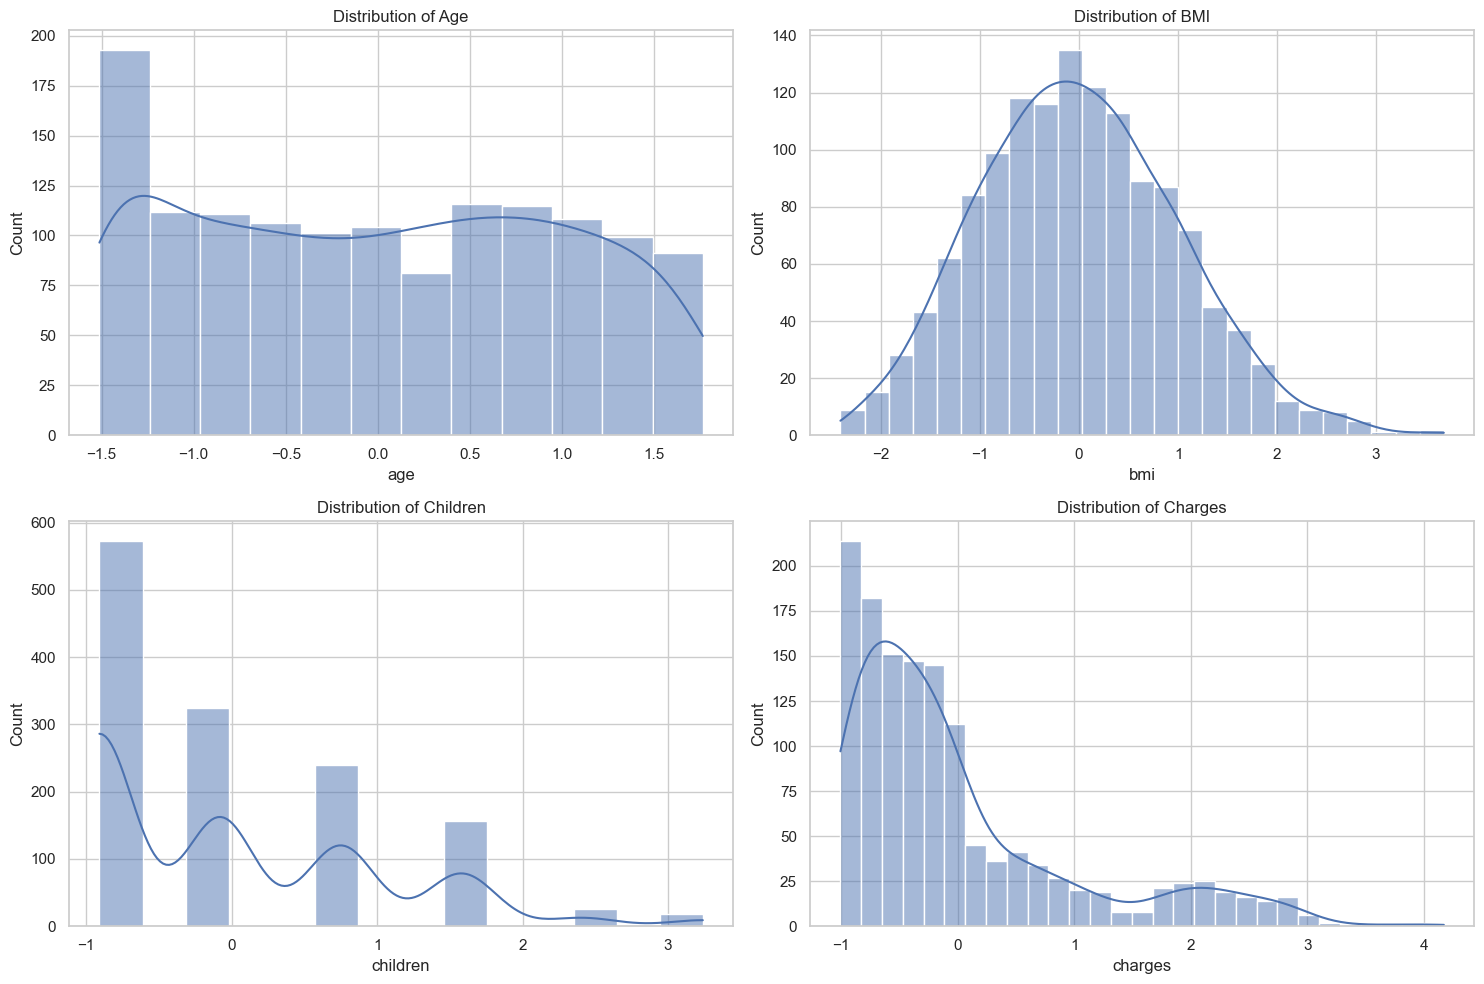

In [10]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distributions of the key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'age'
sns.histplot(data_encoded['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Plot for 'bmi'
sns.histplot(data_encoded['bmi'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI')

# Plot for 'children'
sns.histplot(data_encoded['children'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Children')

# Plot for 'charges'
sns.histplot(data_encoded['charges'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Charges')

plt.tight_layout()
plt.show()


Age: The distribution of age appears to be fairly uniform across different ages, indicating a diverse age range in the dataset.

BMI: The BMI distribution looks approximately normally distributed, with a slight right-skew. This indicates that most individuals have a BMI around the center of the distribution, with fewer individuals having extremely high or low BMI.

Children: This distribution shows that a large number of individuals have few or no children, with the number of individuals decreasing as the number of children increases.

Charges: The charges distribution is right-skewed, indicating that most individuals have lower medical charges, with a smaller number of individuals incurring very high medical charges.

#### Calculating the correlation coefficients

In [11]:
# Calculating the correlation coefficients
correlation_matrix = data_encoded.corr()

# Extracting the correlations of all features with 'charges'
charges_correlations = correlation_matrix['charges'].sort_values(ascending=False)

charges_correlations


charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northeast    0.005945
region_northwest   -0.038695
region_southwest   -0.043637
sex_female         -0.058044
smoker_no          -0.787234
Name: charges, dtype: float64

The correlation coefficients between the features and the target variable charges are as follows:

Smoker Status (smoker_yes/smoker_no): Shows the strongest correlation with charges. Being a smoker (smoker_yes) has a high positive correlation, indicating that smokers tend to have higher charges.

Age: Has a moderate positive correlation with charges, suggesting that older individuals tend to have higher charges.

BMI: Also shows a positive correlation, indicating higher charges with increasing BMI.

Children: Has a smaller positive correlation, suggesting a slight increase in charges with more children.

Region: The correlations are relatively low, but the region_southeast has a slightly higher correlation compared to other regions.

Sex: Shows a very low correlation with charges, with sex_male having a slightly positive correlation.

#### scatter plots for continuous features like age, children and bmi against charges

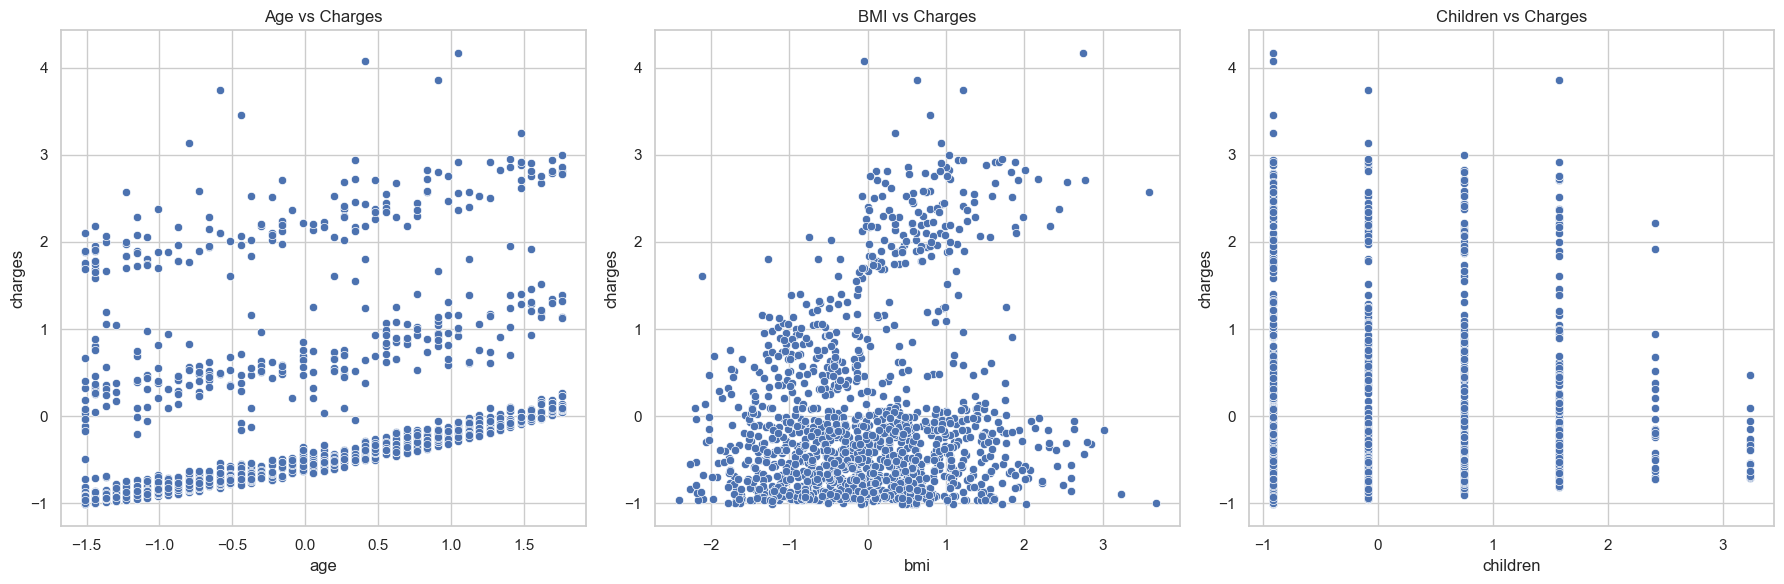

In [12]:
# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for 'age' vs 'charges'
sns.scatterplot(x='age', y='charges', data=data_encoded, ax=axes[0])
axes[0].set_title('Age vs Charges')

# Scatter plot for 'bmi' vs 'charges'
sns.scatterplot(x='bmi', y='charges', data=data_encoded, ax=axes[1])
axes[1].set_title('BMI vs Charges')

# Scatter plot for 'children' vs 'charges'
sns.scatterplot(x='children', y='charges', data=data_encoded, ax=axes[2])
axes[2].set_title('Children vs Charges')

plt.tight_layout()
plt.show()


The scatter plots provide insights into how age, bmi, and children relate to the target variable charges:

Age vs Charges: There's a clear trend of increasing charges with age, which aligns with the positive correlation observed earlier.

BMI vs Charges: While the relationship is less distinct than age, there's still an observable trend where higher BMI tends to be associated with higher charges.

Children vs Charges: The relationship is not very pronounced. While there's some variation in charges with the number of children, it doesn't display a strong or clear trend.

#### box plots for categorical features (like sex, smoker, and region) 

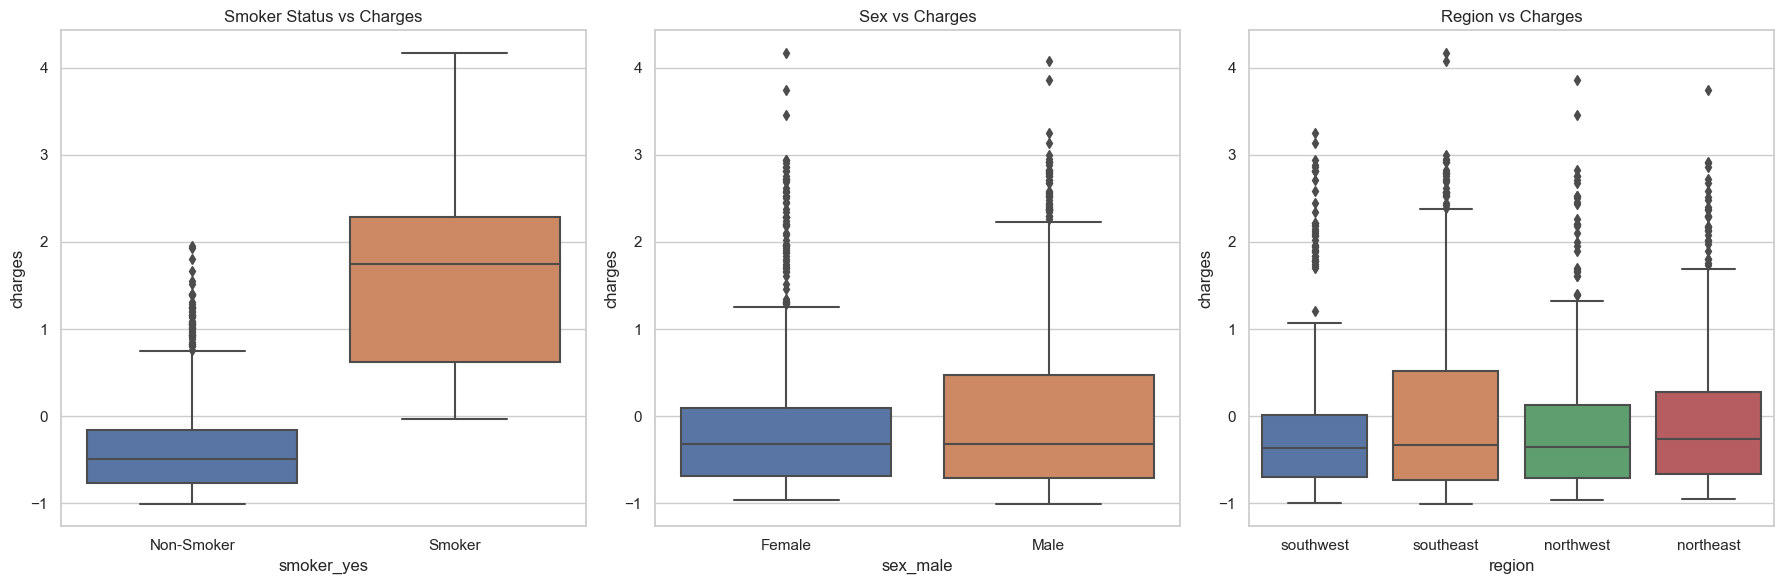

In [13]:
# Setting up the matplotlib figure for box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for 'smoker' vs 'charges'
sns.boxplot(x='smoker_yes', y='charges', data=data_encoded, ax=axes[0])
axes[0].set_title('Smoker Status vs Charges')
axes[0].set_xticklabels(['Non-Smoker', 'Smoker'])

# Box plot for 'sex' vs 'charges'
sns.boxplot(x='sex_male', y='charges', data=data_encoded, ax=axes[1])
axes[1].set_title('Sex vs Charges')
axes[1].set_xticklabels(['Female', 'Male'])

# Combining the one-hot encoded region columns for the plot
data_encoded['region'] = data_encoded[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1).str.replace('region_', '')

# Box plot for 'region' vs 'charges'
sns.boxplot(x='region', y='charges', data=data_encoded, ax=axes[2])
axes[2].set_title('Region vs Charges')

plt.tight_layout()
plt.show()


The box plots reveal the following relationships between smoker status, sex, region, and charges:

Smoker Status vs Charges: There is a significant difference in charges between smokers and non-smokers. Smokers generally have much higher medical charges, which aligns with the strong positive correlation observed earlier.

Sex vs Charges: The difference in charges between females and males is less pronounced. Although males have a slightly wider range of charges, the medians are quite similar.

Region vs Charges: The box plots show some variation in charges across different regions, but the differences are not as stark as those observed for smoker status. The southeast region appears to have a slightly higher median charge compared to others.

#### Identify potential outliers or influential points

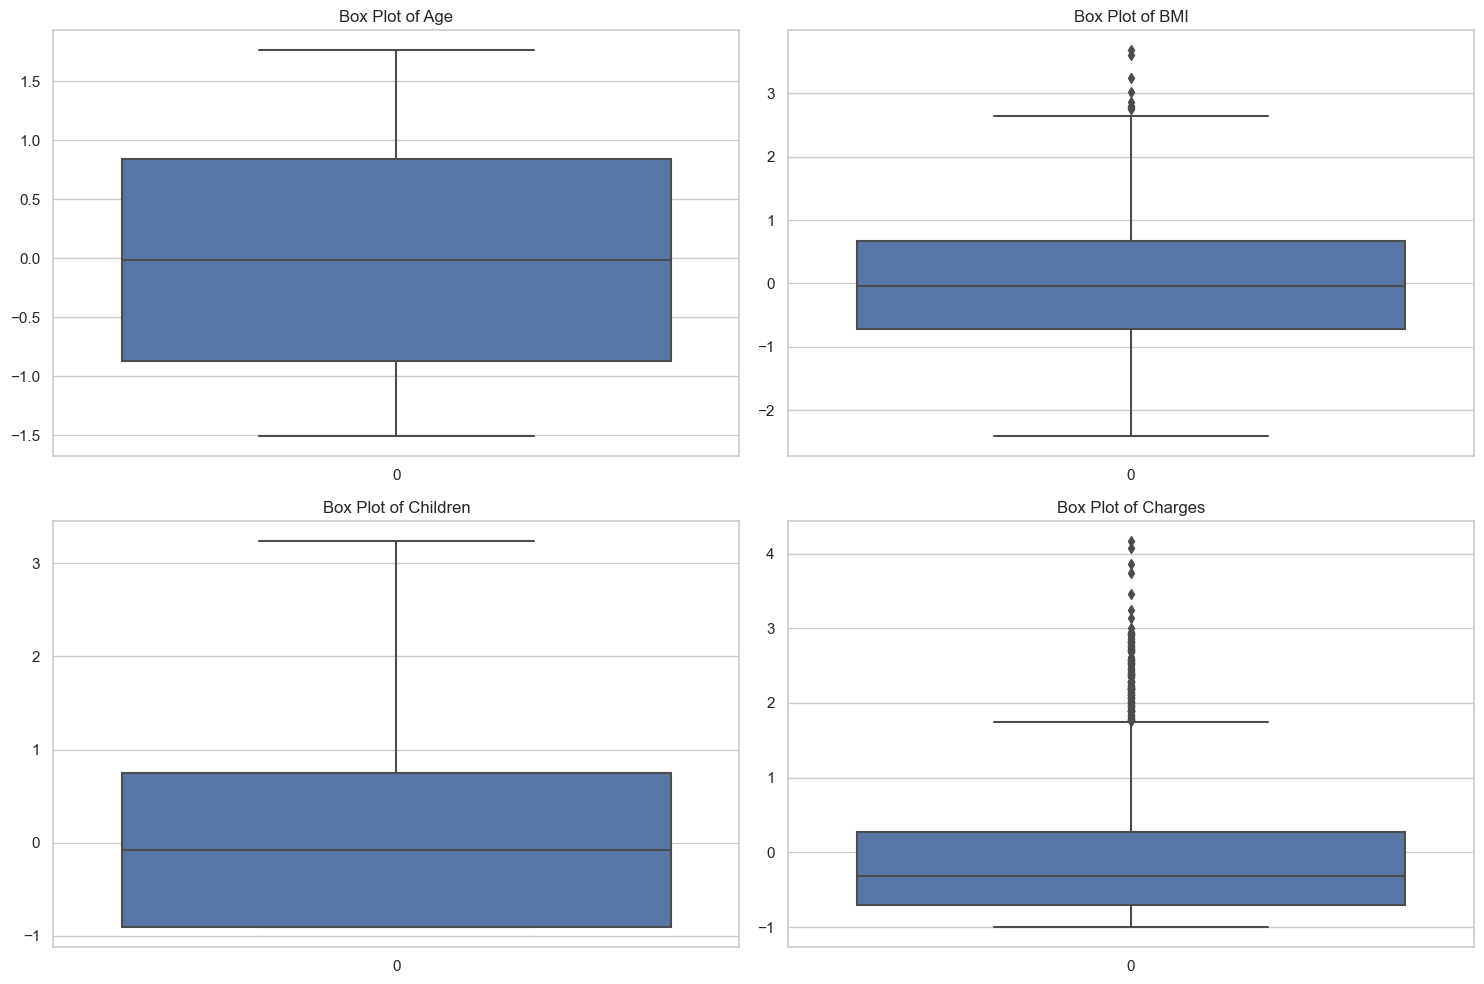

,Lower Bound,Upper Bound
age,-3.434850,3.403205
bmi,-2.785820,2.730574
children,-3.398612,3.239729
charges,-2.180754,1.754994


In [14]:
# Setting up the matplotlib figure for box plots of numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for 'age'
sns.boxplot(data_encoded['age'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Age')

# Box plot for 'bmi'
sns.boxplot(data_encoded['bmi'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of BMI')

# Box plot for 'children'
sns.boxplot(data_encoded['children'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Children')

# Box plot for 'charges'
sns.boxplot(data_encoded['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Charges')

plt.tight_layout()
plt.show()

# Calculating the IQR for each numerical feature
iqr = data_encoded[numerical_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
iqr_outliers = pd.DataFrame({'Lower Bound': data_encoded[numerical_cols].quantile(0.25) - 1.5 * iqr,
                             'Upper Bound': data_encoded[numerical_cols].quantile(0.75) + 1.5 * iqr})

iqr_outliers


as we have a option to leave the outlier as it is, therfore i am moving futher withour removing outlier

#### Split the dataset into training and testing sets. we have selected 80-20 ratio

In [31]:
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the sizes of the training and testing sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
train_size, test_size


(1070, 268)

In [32]:
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,True,False,False,True,False,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,False,True,True,False,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,False,True,True,False,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,False,True,True,False,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,False,True,True,False,False,True,False,False
1334,-1.509965,0.206139,-0.908614,-0.914002,True,False,True,False,True,False,False,False
1335,-1.509965,1.014878,-0.908614,-0.961596,True,False,True,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,-0.930362,True,False,True,False,False,False,False,True


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a Linear Regression model
lr_model = LinearRegression()

# Training the model on the training set
lr_model.fit(X_train, y_train)

# Predicting the charges on the testing set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(0.22926355667538664, 0.7835929767120722)

The R-squared value of 0.7836 suggests that the model explains approximately 78.36% of the variance in the charges variable. This is a relatively good fit for the data, although there's still room for improvement.

In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

(mse_ridge, r2_ridge, mse_lasso, r2_lasso)


(0.2294229026884961,
 0.7834425664293833,
 1.0603828998373306,
 -0.0009192486886582252)

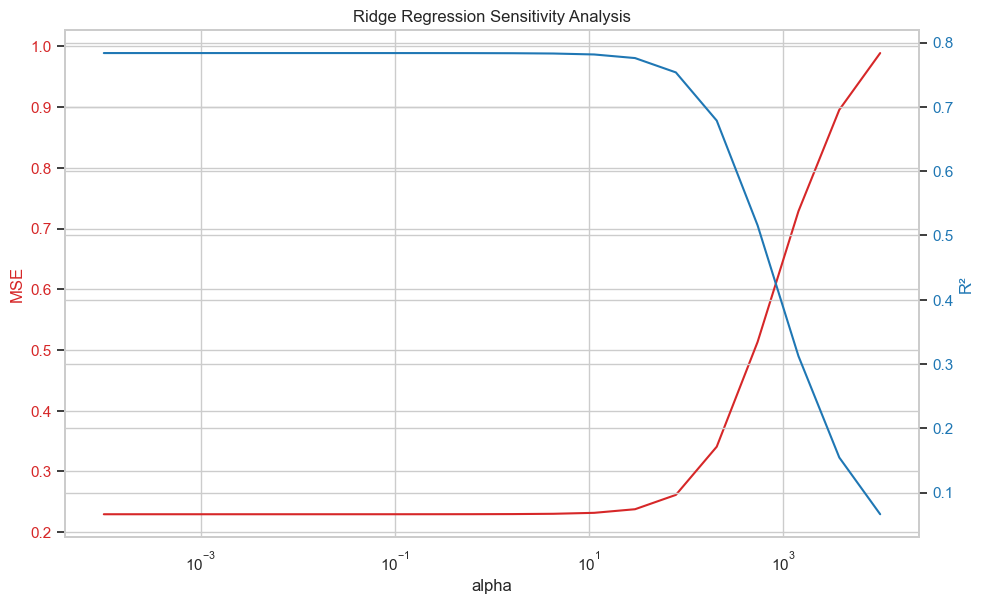

In [36]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

alpha_range = np.logspace(-4, 4, 20)
mse_ridge_values = []
r2_ridge_values = []

for alpha in alpha_range:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    
    mse_ridge_values.append(mean_squared_error(y_test, y_pred_ridge))
    r2_ridge_values.append(r2_score(y_test, y_pred_ridge))

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alpha_range, mse_ridge_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(alpha_range, r2_ridge_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Ridge Regression Sensitivity Analysis')
plt.show()
